In [1]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers.experimental.preprocessing import CenterCrop

from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
from tensorflow import keras
from termcolor import colored


from dataset_manager import *
from predict import *
from trame_show import *

train_dataset, test_dataset = get_dataset()
d_list = list(test_dataset)

X_train, Y_train = get_X_Y(train_dataset)

X_test, Y_test = get_X_Y(test_dataset)

X_login_mdp, _ = get_pics_from_file(f"../tohack/pics_LOGINMDP.bin")

#X = []
#for i in range(0, len(Y_train) - 1):
#    X.append([Y_train[i], X_train[i]])

In [2]:
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
from dataset_manager import *
from predict import *

train_dataset, test_dataset = get_dataset()
X_train, Y_train = get_X_Y_vectorized_int(train_dataset)
X_test, Y_test = get_X_Y_vectorized_int(test_dataset)

X_train, Y_train = shuffle_X_Y(X_train, Y_train)
X_test, Y_test = shuffle_X_Y(X_test, Y_test)

model = Sequential()
#model.add(Flatten(input_shape=(len(X_train), 17)))
model.add(Dense(17))
for _ in range(6):
    model.add(Dense(128, activation='sigmoid'))
model.add(Dense(42))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


model.fit(np.array(X_train), np.array(Y_train), epochs=10)
model.summary()

Epoch 1/10
7875/7875 [==============================] - 8s 1ms/step - loss: 0.0233 - accuracy: 0.1127
Epoch 2/10
7875/7875 [==============================] - 8s 1ms/step - loss: 0.0152 - accuracy: 0.4330
Epoch 3/10
7875/7875 [==============================] - 8s 999us/step - loss: 0.0138 - accuracy: 0.4783
Epoch 4/10
7875/7875 [==============================] - 8s 982us/step - loss: 0.0133 - accuracy: 0.4959
Epoch 5/10
7875/7875 [==============================] - 8s 989us/step - loss: 0.0130 - accuracy: 0.5092
Epoch 6/10
7875/7875 [==============================] - 8s 989us/step - loss: 0.0128 - accuracy: 0.5157
Epoch 7/10
7875/7875 [==============================] - 8s 1ms/step - loss: 0.0127 - accuracy: 0.5201
Epoch 8/10
7875/7875 [==============================] - 8s 1ms/step - loss: 0.0127 - accuracy: 0.5241
Epoch 9/10
7875/7875 [==============================] - 8s 1ms/step - loss: 0.0125 - accuracy: 0.5286
Epoch 10/10
7875/7875 [==============================] - 8s 1ms/step - los

In [3]:
test_loss, test_acc = model.evaluate(np.array(X_test), np.array(Y_test), verbose=3)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.5464702844619751


In [4]:
accuracy = compute_accuracy_keras(model, d_list, X_test, Y_test)
for key, acc in accuracy.items():
    print(key, acc)
    
print("accuracy: ", sum(accuracy.values()) / 42)

ENTER 0.8690958164642375
G 0.41535776614310643
NOKEY 0.9676518159094251
7 0.49762624082865775
SHIFT 0.9719626168224299
9 0.6480938416422287
C 0.6952112676056338
U 0.1492671253365241
N 0.8132239382239382
P 0.9032082653616096
CTRL 0.9724680432645034
O 0.7701863354037267
E 0.8888888888888888
Y 0.37774594078319007
L 0.9326874043855176
K 0.8075909330521877
V 0.7153846153846154
SPACE 0.7327823691460055
5 0.47414880201765447
T 0.16909620991253643
W 0.13499184339314846
Z 0.7044392523364486
0 0.6011860637509266
H 0.6032064128256514
1 0.5316296606619187
I 0.8227326266195524
F 0.6976341604154646
B 0.3659132559560171
R 0.3193127962085308
2 0.5758985200845665
6 0.2942840973401245
X 0.2857742341586236
J 0.7336683417085427
SUPPR 0.6287004515805319
M 0.09068746952705997
D 0.1058057514921324
A 0.8657551274083282
4 0.08039784500621633
S 0.029857397504456328
Q 0.02081977878985036
accuracy:  0.5301041267463027


In [5]:
res = get_prediction_list_keras(model, d_list)
print(res)

['7', 'P', 'CTRL', '7', 'Z', '0', '1', 'P', 'P', '2', '2', 'R', 'T', 'U', '7', '0', 'H', 'CTRL', '1', '1', 'H', '7', '2', 'P', 'CTRL', 'E', 'CTRL', 'E', '2', '2', '2', 'R', '1', '7', 'SUPPR', '7', '1', 'H', 'CTRL', 'CTRL', 'H', 'R', '7', 'K', 'CTRL', '7', 'P', '2', 'CTRL', 'P', 'SHIFT', 'Z', 'CTRL', 'CTRL', 'E', 'CTRL', 'Z', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'F', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTR

In [6]:
get_creds(res)

#####################
['CTRL', 'CTRL', 'SUPPR', 'SUPPR', 'SUPPR', '0', 'SUPPR', '0', '0', '0', '0', '0', 'SUPPR', 'SUPPR', '0', '2', '0', 'SUPPR', '0', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', '0', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', '0', 'SUPPR', '0']
#####################
['CTRL', 'SUPPR', 'SUPPR', 'SUPPR', '0', 'SUPPR', '0', '0', '0', '0', '0', 'SUPPR', 'SUPPR', '0', '2', '0', 'SUPPR', '0', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', '0', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR']
#####################
['CTRL', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', '0', '0', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', 'SUPPR', 'SUPPR', '0', 'SUPPR', 'SUPPR', '0', 'SUPPR', 'SUPPR', 'SUPPR', '0', '0', '0', '0', '0', 'SUPPR', 'SUPPR', 'SUPPR', 'SU

['P', 'CTRL', 'E', 'SHIFT', 'ENTER', 'A', 'L']


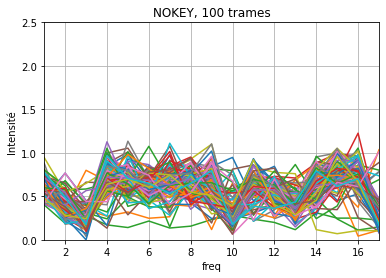

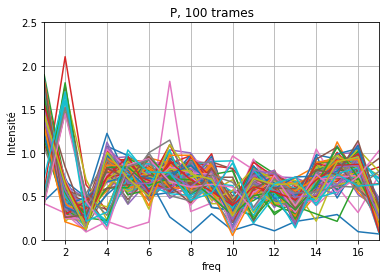

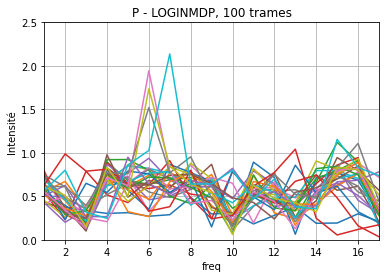

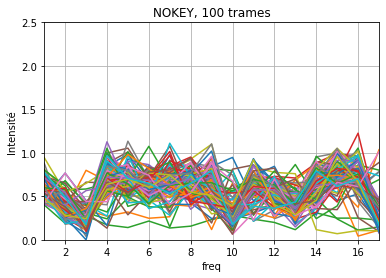

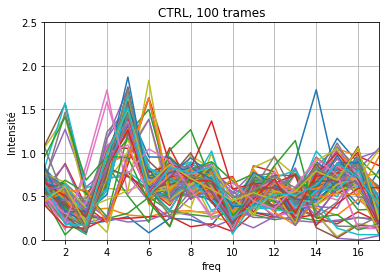

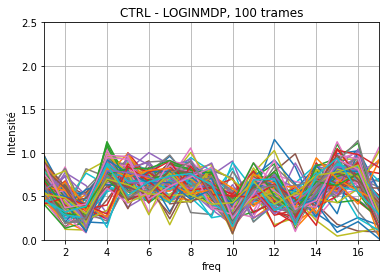

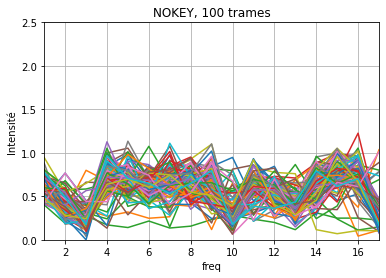

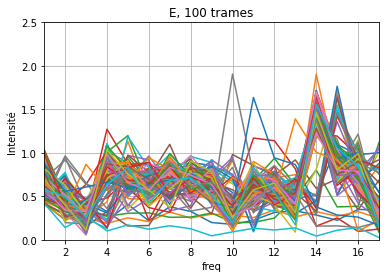

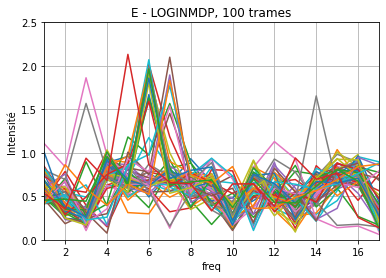

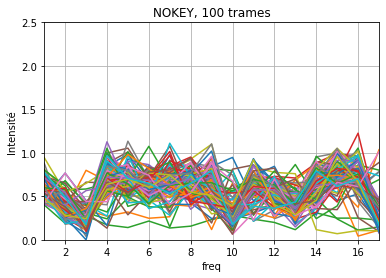

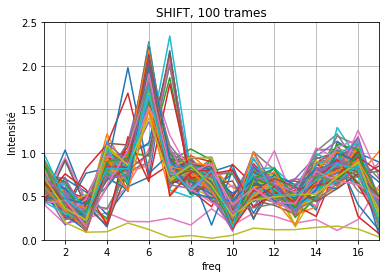

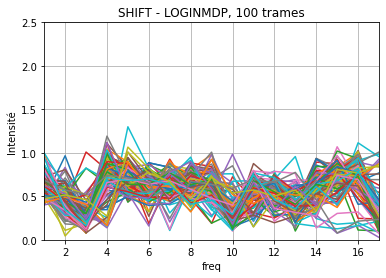

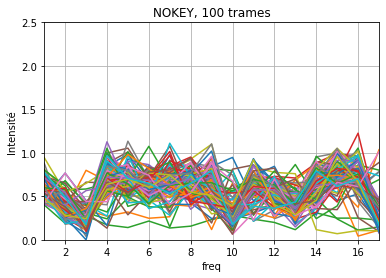

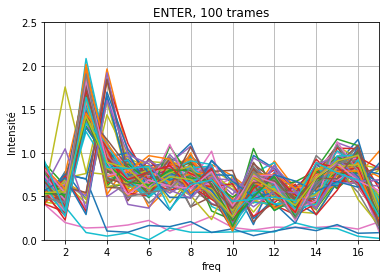

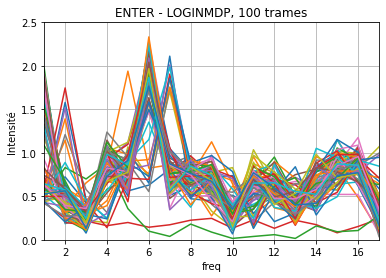

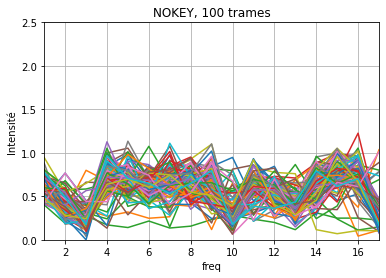

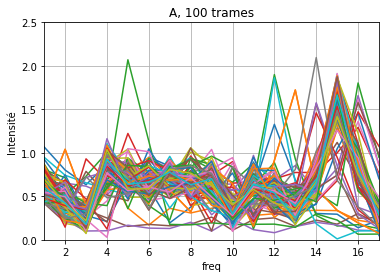

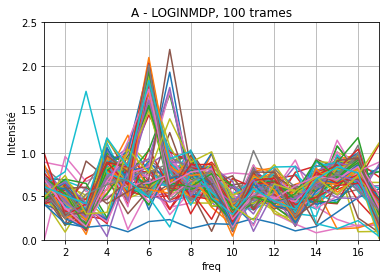

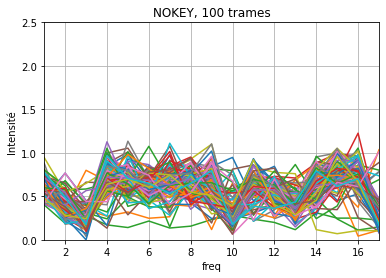

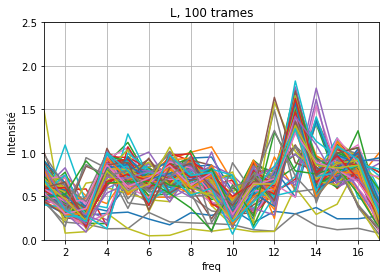

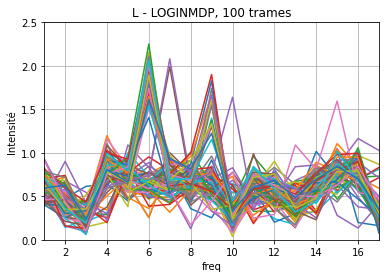

In [8]:
out = ""
trames80 = {}
for index, key in enumerate(res):
    if key not in []:
        out += colored(key, 'red' if accuracy[key] >= 0.85 else 'grey') + " "
        if accuracy[key] >= 0.85:
            if key not in trames80:
                trames80[key] = []
            trames80[key].append(X_login_mdp[index])
#print(out)
trame_show_result(trames80)